In [ ]:
import os
import sys

In [ ]:
!pip install monai
!pip install pytest-shutil
!pip install torchinfo

In [ ]:
base_dir = os.path.join(os.getcwd(), 'drive', 'MyDrive')
dataset_dir = os.path.join(base_dir, 'datasets', 'Task09_Spleen')
save_dir = os.path.join(base_dir, 'results', 'spleen_segment')

sys.path.append(base_dir)
sys.path.append(dataset_dir)
print(base_dir)
print(dataset_dir)
print(save_dir)


/content/drive/MyDrive
/content/drive/MyDrive/datasets/Task09_Spleen
/content/drive/MyDrive/results/spleen_segment


In [ ]:
import nibabel as nib
import numpy as np
import os
import shutil
# import pythonfiles.segmentation_utils as segutils
from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.losses import DiceLoss, DiceCELoss
from torchinfo import summary
import segmentation_utils2 as segutils
import torch

### Creating Dataloader

In [ ]:
train_test_dir = dataset_dir
save_dir = save_dir
# save_name = 'liver_segmentation_model'
save_name = 'spleen_segmentation_model'
device = segutils.get_default_device()
# train_test_folders = ["Train_data", "Train_labels", "Test_data", "Test_labels"]
train_test_folders = ['imagesTr', 'labelsTr', 'imagesTs']
transform_type = ['load', 'ensurech', 'space', 'orient', 'scaleint', 'cropfore', 'resize', 'tens']

train_test_dl = segutils.create_dataloader(train_test_dir, pixdim=(1.5, 1.5, 1.0), a_min=-200, a_max=200, 
                       spatial_size=[128,128,64], train_test_folders=train_test_folders, 
                       transform_type=transform_type, cache=True)

Loading dataset: 100%|██████████| 20/20 [01:42<00:00,  5.12s/it]


### Creating the model

In [ ]:

model = UNet(
    dimensions=3,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256), 
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
).to(device)
loss_function = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
optimizer = torch.optim.Adam(model.parameters(), 1e-5, weight_decay=1e-5, amsgrad=True)

model.load_state_dict(torch.load(os.path.join(save_dir, 'spleen_segmentation_model_dict.pt')), strict=False)


/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:219: FutureWarning: monai.networks.nets.unet UNet.__init__:dimensions: Argument `dimensions` has been deprecated since version 0.6. Please use `spatial_dims` instead.
  warn_deprecated(argname, msg, warning_category)


<All keys matched successfully>

### Training the model

In [ ]:

if __name__ == '__main__':
    segutils.segmentation_train_only(model, train_test_dl, loss_function, optimizer, 
                                   200, save_dir, save_name, device=device)


100%|██████████| 41/41 [00:06<00:00,  6.73it/s]


Epoch: 1 | Train Loss:  0.04666 | Train Metric:  0.95334




100%|██████████| 41/41 [00:05<00:00,  6.89it/s]


Epoch: 2 | Train Loss:  0.04642 | Train Metric:  0.95358




100%|██████████| 41/41 [00:06<00:00,  6.65it/s]


Epoch: 3 | Train Loss:  0.04618 | Train Metric:  0.95382




100%|██████████| 41/41 [00:06<00:00,  6.79it/s]


Epoch: 4 | Train Loss:  0.04649 | Train Metric:  0.95351




100%|██████████| 41/41 [00:06<00:00,  6.68it/s]


Epoch: 5 | Train Loss:  0.04628 | Train Metric:  0.95372




100%|██████████| 41/41 [00:06<00:00,  6.81it/s]


Epoch: 6 | Train Loss:  0.04587 | Train Metric:  0.95413




100%|██████████| 41/41 [00:06<00:00,  6.70it/s]


Epoch: 7 | Train Loss:  0.04540 | Train Metric:  0.95460




100%|██████████| 41/41 [00:05<00:00,  6.84it/s]


Epoch: 8 | Train Loss:  0.04534 | Train Metric:  0.95466




100%|██████████| 41/41 [00:06<00:00,  6.69it/s]


Epoch: 9 | Train Loss:  0.04467 | Train Metric:  0.95533




100%|██████████| 41/41 [00:06<00:00,  6.83it/s]


Epoch: 10 | Train Loss:  0.04492 | Train Metric:  0.95508




100%|██████████| 41/41 [00:05<00:00,  6.85it/s]


Epoch: 11 | Train Loss:  0.04423 | Train Metric:  0.95577




100%|██████████| 41/41 [00:06<00:00,  6.79it/s]


Epoch: 12 | Train Loss:  0.04430 | Train Metric:  0.95570




100%|██████████| 41/41 [00:05<00:00,  6.90it/s]


Epoch: 13 | Train Loss:  0.04401 | Train Metric:  0.95599




100%|██████████| 41/41 [00:06<00:00,  6.73it/s]


Epoch: 14 | Train Loss:  0.04380 | Train Metric:  0.95620




100%|██████████| 41/41 [00:05<00:00,  6.88it/s]


Epoch: 15 | Train Loss:  0.04359 | Train Metric:  0.95641




100%|██████████| 41/41 [00:06<00:00,  6.73it/s]


Epoch: 16 | Train Loss:  0.04349 | Train Metric:  0.95651




100%|██████████| 41/41 [00:05<00:00,  6.84it/s]


Epoch: 17 | Train Loss:  0.04359 | Train Metric:  0.95641




100%|██████████| 41/41 [00:06<00:00,  6.69it/s]


Epoch: 18 | Train Loss:  0.04329 | Train Metric:  0.95671




100%|██████████| 41/41 [00:06<00:00,  6.81it/s]


Epoch: 19 | Train Loss:  0.04322 | Train Metric:  0.95678




100%|██████████| 41/41 [00:06<00:00,  6.66it/s]


Epoch: 20 | Train Loss:  0.04290 | Train Metric:  0.95710




100%|██████████| 41/41 [00:06<00:00,  6.80it/s]


Epoch: 21 | Train Loss:  0.04303 | Train Metric:  0.95697




100%|██████████| 41/41 [00:06<00:00,  6.77it/s]


Epoch: 22 | Train Loss:  0.04241 | Train Metric:  0.95759




/content/drive/MyDrive/segmentation_utils2.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 10))
100%|██████████| 41/41 [00:06<00:00,  6.73it/s]


Epoch: 23 | Train Loss:  0.04267 | Train Metric:  0.95733




100%|██████████| 41/41 [00:06<00:00,  6.77it/s]


Epoch: 24 | Train Loss:  0.04231 | Train Metric:  0.95769




100%|██████████| 41/41 [00:06<00:00,  6.67it/s]


Epoch: 25 | Train Loss:  0.04272 | Train Metric:  0.95728




100%|██████████| 41/41 [00:06<00:00,  6.83it/s]


Epoch: 26 | Train Loss:  0.04199 | Train Metric:  0.95801




100%|██████████| 41/41 [00:06<00:00,  6.65it/s]


Epoch: 27 | Train Loss:  0.04192 | Train Metric:  0.95808




100%|██████████| 41/41 [00:05<00:00,  6.85it/s]


Epoch: 28 | Train Loss:  0.04135 | Train Metric:  0.95865




100%|██████████| 41/41 [00:06<00:00,  6.63it/s]


Epoch: 29 | Train Loss:  0.04130 | Train Metric:  0.95870




100%|██████████| 41/41 [00:06<00:00,  6.80it/s]


Epoch: 30 | Train Loss:  0.04107 | Train Metric:  0.95893




100%|██████████| 41/41 [00:06<00:00,  6.67it/s]


Epoch: 31 | Train Loss:  0.04103 | Train Metric:  0.95897




100%|██████████| 41/41 [00:06<00:00,  6.81it/s]


Epoch: 32 | Train Loss:  0.04084 | Train Metric:  0.95916




100%|██████████| 41/41 [00:06<00:00,  6.68it/s]


Epoch: 33 | Train Loss:  0.04109 | Train Metric:  0.95891




100%|██████████| 41/41 [00:06<00:00,  6.74it/s]


Epoch: 34 | Train Loss:  0.04082 | Train Metric:  0.95918




100%|██████████| 41/41 [00:06<00:00,  6.76it/s]


Epoch: 35 | Train Loss:  0.04036 | Train Metric:  0.95964




100%|██████████| 41/41 [00:06<00:00,  6.62it/s]


Epoch: 36 | Train Loss:  0.04003 | Train Metric:  0.95997




100%|██████████| 41/41 [00:06<00:00,  6.64it/s]


Epoch: 37 | Train Loss:  0.03955 | Train Metric:  0.96045




100%|██████████| 41/41 [00:06<00:00,  6.75it/s]


Epoch: 38 | Train Loss:  0.03950 | Train Metric:  0.96050




100%|██████████| 41/41 [00:06<00:00,  6.69it/s]


Epoch: 39 | Train Loss:  0.03944 | Train Metric:  0.96056




100%|██████████| 41/41 [00:06<00:00,  6.68it/s]


Epoch: 40 | Train Loss:  0.03923 | Train Metric:  0.96077




100%|██████████| 41/41 [00:06<00:00,  6.69it/s]


Epoch: 41 | Train Loss:  0.03933 | Train Metric:  0.96067




100%|██████████| 41/41 [00:06<00:00,  6.64it/s]


Epoch: 42 | Train Loss:  0.03925 | Train Metric:  0.96075




100%|██████████| 41/41 [00:06<00:00,  6.73it/s]


Epoch: 43 | Train Loss:  0.03869 | Train Metric:  0.96131




100%|██████████| 41/41 [00:06<00:00,  6.60it/s]


Epoch: 44 | Train Loss:  0.03850 | Train Metric:  0.96150




100%|██████████| 41/41 [00:06<00:00,  6.73it/s]


Epoch: 45 | Train Loss:  0.03821 | Train Metric:  0.96179




100%|██████████| 41/41 [00:06<00:00,  6.55it/s]


Epoch: 46 | Train Loss:  0.03826 | Train Metric:  0.96174




100%|██████████| 41/41 [00:06<00:00,  6.73it/s]


Epoch: 47 | Train Loss:  0.03828 | Train Metric:  0.96172




100%|██████████| 41/41 [00:06<00:00,  6.63it/s]


Epoch: 48 | Train Loss:  0.03809 | Train Metric:  0.96191




100%|██████████| 41/41 [00:06<00:00,  6.72it/s]


Epoch: 49 | Train Loss:  0.03784 | Train Metric:  0.96216




100%|██████████| 41/41 [00:06<00:00,  6.64it/s]


Epoch: 50 | Train Loss:  0.03775 | Train Metric:  0.96225




100%|██████████| 41/41 [00:06<00:00,  6.69it/s]


Epoch: 51 | Train Loss:  0.03761 | Train Metric:  0.96239




100%|██████████| 41/41 [00:06<00:00,  6.66it/s]


Epoch: 52 | Train Loss:  0.03798 | Train Metric:  0.96202




100%|██████████| 41/41 [00:06<00:00,  6.67it/s]


Epoch: 53 | Train Loss:  0.03739 | Train Metric:  0.96261




100%|██████████| 41/41 [00:06<00:00,  6.68it/s]


Epoch: 54 | Train Loss:  0.03743 | Train Metric:  0.96257




100%|██████████| 41/41 [00:06<00:00,  6.62it/s]


Epoch: 55 | Train Loss:  0.03716 | Train Metric:  0.96284




100%|██████████| 41/41 [00:06<00:00,  6.71it/s]


Epoch: 56 | Train Loss:  0.03692 | Train Metric:  0.96308




100%|██████████| 41/41 [00:06<00:00,  6.59it/s]


Epoch: 57 | Train Loss:  0.03643 | Train Metric:  0.96357




100%|██████████| 41/41 [00:06<00:00,  6.73it/s]


Epoch: 58 | Train Loss:  0.03624 | Train Metric:  0.96376




100%|██████████| 41/41 [00:06<00:00,  6.54it/s]


Epoch: 59 | Train Loss:  0.03624 | Train Metric:  0.96376




100%|██████████| 41/41 [00:06<00:00,  6.67it/s]


Epoch: 60 | Train Loss:  0.03633 | Train Metric:  0.96367




100%|██████████| 41/41 [00:06<00:00,  6.60it/s]


Epoch: 61 | Train Loss:  0.03631 | Train Metric:  0.96369




100%|██████████| 41/41 [00:06<00:00,  6.62it/s]


Epoch: 62 | Train Loss:  0.03614 | Train Metric:  0.96386




100%|██████████| 41/41 [00:06<00:00,  6.69it/s]


Epoch: 63 | Train Loss:  0.03591 | Train Metric:  0.96409




100%|██████████| 41/41 [00:06<00:00,  6.70it/s]


Epoch: 64 | Train Loss:  0.03580 | Train Metric:  0.96420




100%|██████████| 41/41 [00:06<00:00,  6.77it/s]


Epoch: 65 | Train Loss:  0.03578 | Train Metric:  0.96422




100%|██████████| 41/41 [00:06<00:00,  6.58it/s]


Epoch: 66 | Train Loss:  0.03567 | Train Metric:  0.96433




100%|██████████| 41/41 [00:06<00:00,  6.76it/s]


Epoch: 67 | Train Loss:  0.03580 | Train Metric:  0.96420




 34%|███▎      | 67/199 [07:24<14:35,  6.64s/it]


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f0db0c78a60> (for post_execute):


KeyboardInterrupt: ignored

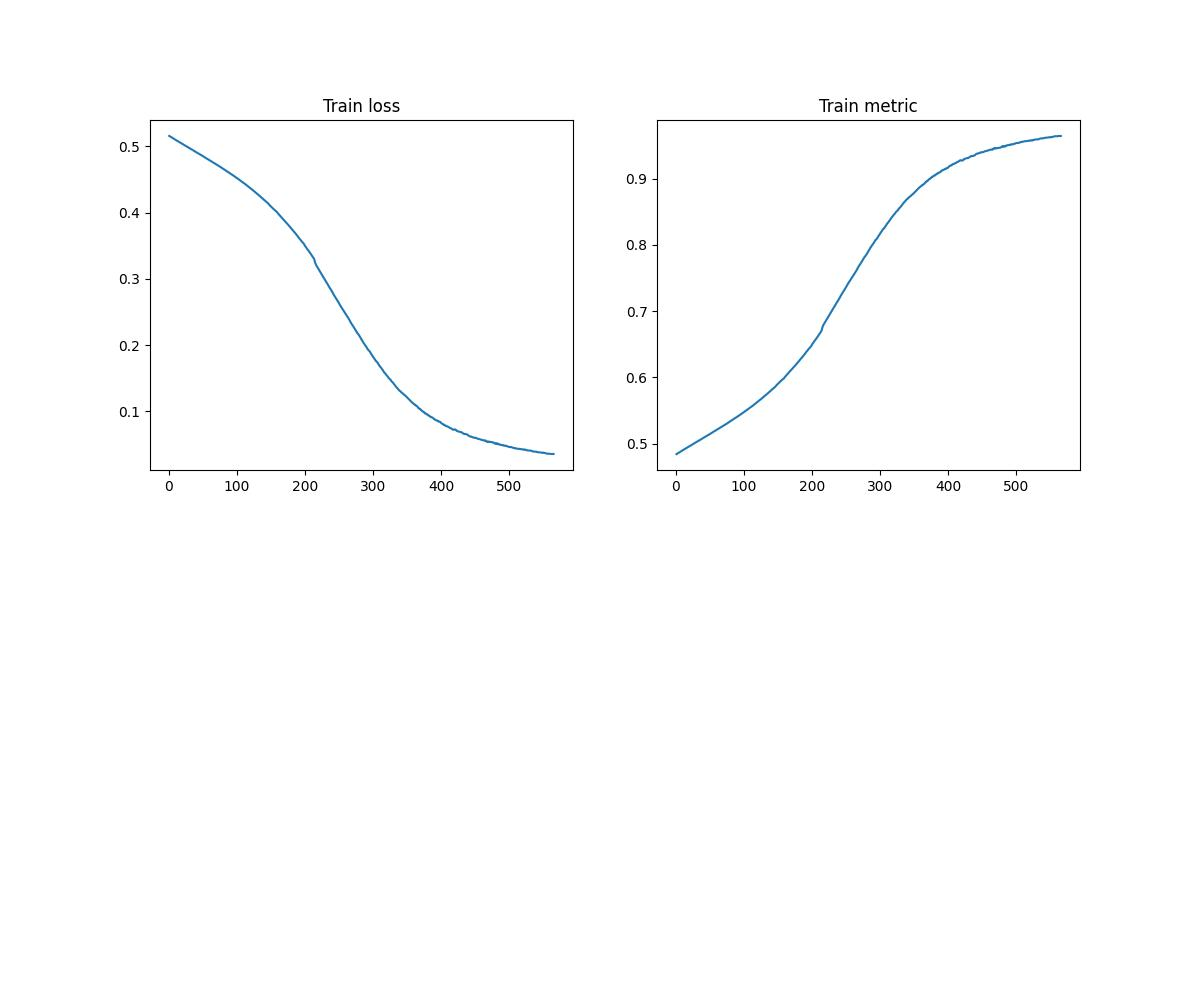

<figure class = 'video_container'>
    <video controls="true" allowfullscreen="false">
        <source src="train_vid.mp4" type="video/mp4">
    </video>
                                                                                                   
</figure>

"D:/Work_folder/Python_files/models/spleen_seg/train_vid.avi"